## Fuzzy Inference System


<img src="images/image-1.png"/>


<img src="images/image-2.png"/>

<img src="images/image-3.png"/>

<img src="images/image-4.png"/>

<img src="images/image-4.png"/>

<img src="images/image-4.png"/>


<img src="images/image-5.png"/>

In [2]:
# Permintaan = demand (inc, dec)
# Persediaan = stock (aLittle, aLot)
# Produksi  = production (add, reduce)

demand = {
    'decrease': {0: 1, 1000: 1, 5000: 0, 6000: 0}, # turun
    'increase': {0:0, 1000: 0, 5000: 1, 9000: 0} # naik
}
stock = {
    'a_little': {100: 1, 600: 0}, # sedikit
    'a_lot': {100: 0, 600: 1} # banyak
}
production = {
    'reduce': {2000: 1, 7000: 0}, # mengurangi
    'add': {2000: 0, 7000: 1} # menambah
}

In [3]:
import matplotlib.pyplot as plt

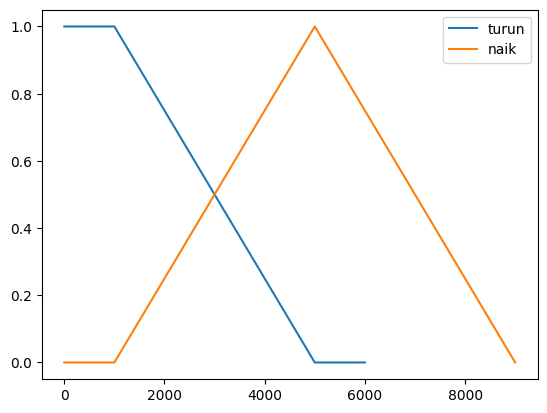

In [7]:


plt.plot(demand['decrease'].keys(), demand['decrease'].values(), label='turun')
plt.plot(demand['increase'].keys(), demand['increase'].values(),label='naik')

plt.legend()
plt.show()

In [9]:
class BaseFuzzy():
    def __init__(self):
        self.max_value = 0
        self.min_value = 0
        
    def down(self, x):
        return (self.max_value - x)/(self.max_value - self.min_value)
        
    def up(self, x):
        return (x - self.min_value)/(self.max_value - self.min_value)
        
    def rev_down(self, f):
        return self.max_value - f * (self.max_value - self.min_value)
        
    def rev_up(self, f):
        return f * (self.max_value - self.min_value) + self.min_value
    

In [100]:
fuzzy = BaseFuzzy()
fuzzy.min_value = 1000
fuzzy.max_value = 5000
x = 4000

In [102]:
fuzzy.up(x)

0.75

In [97]:
fuzzy.min_value = 100
fuzzy.max_value = 600
x = 300

In [99]:
fuzzy.down(x)

0.6

In [82]:
fuzzy = BaseFuzzy()
fuzzy.min_value = 2000
fuzzy.max_value = 7000
p = 0.6

In [83]:
fuzzy.rev_up(p)

5000.0

In [10]:
# Permintaan

class Demand(BaseFuzzy):

    def __init__(self):
        self.min_value = 1000
        self.max_value = 5000
        self.x = 0
    def decrease(self):
        if self.x <= self.min_value:
            return 1
        elif self.x >= self.max_value:
            return 0
        else:
            return self.down(self.x)
            
    def increase(self):
        if self.x <= self.min_value:
            return 0
        elif self.x >= self.max_value:
            return 1
        else:
            return self.up(self.x)

In [103]:
demand = Demand()
demand.x = 4000

print('turun', demand.decrease())
print('naik', demand.increase())

turun 0.25
naik 0.75


In [11]:
# Persediaan

class Stock(BaseFuzzy):

    def __init__(self):
        self.min_value = 100
        self.max_value = 600

    def a_little(self):
        if self.x <= self.min_value:
            return 1
        elif self.x >= self.max_value:
            return 0
        else:
            return self.down(self.x)
            
    def a_lot(self):
        if self.x <= self.min_value:
            return 0
        elif self.x >= self.max_value:
            return 1
        else:
            return self.up(self.x)

In [86]:
stock = Stock()
stock.x = 300
print('sedikit', stock.a_little())
print('banyak', stock.a_lot())

sedikit 0.6
banyak 0.4


In [12]:
# Produksi

class Production(BaseFuzzy):

    def __init__(self):
        self.min_value = 2000
        self.max_value = 7000
        self.r = 0
    def rev_reduce(self):
        return self.rev_down(self.r)
    def rev_add(self):
        return self.rev_up(self.r)

In [126]:
prod = Production()
prod.f = 0.25
print('berkurang', prod.rev_reduce()) # 5750
prod.f = 0.6
print('bertambah', prod.rev_add()) # 5000

berkurang 5750.0
bertambah 5000.0


In [42]:
# Implementasi Rule
# demand, stock: production
rule = {
    ('decrease','a_lot'): 'reduce', #rule 1
    ('decrease','a_little'): 'add', # rule 2
    ('increase','a_lot'): 'add', # rule 3
    ('increase', 'a_little'): 'add' # rule 4
}
rule

{('decrease', 'a_lot'): 'reduce',
 ('decrease', 'a_little'): 'add',
 ('increase', 'a_lot'): 'add',
 ('increase', 'a_little'): 'add'}

In [16]:
rule['decrease','a_lot']

'reduce'

In [17]:
demand = Demand()
stock = Stock()
prod = Production()
demand.x = 4000
stock.x = 300
idx = 1

fuzzy_real = 0
fuzzy = 0
for k, v in rule.items():
    if k[0] == 'decrease':
        demand_fuzzy = demand.decrease()
    else:
        demand_fuzzy = demand.increase()
    
    if k[1] == 'a_little':
        stock_fuzzy = stock.a_little()
    else:
        stock_fuzzy = stock.a_lot()
    
    fuzzy_prod = min(demand_fuzzy, stock_fuzzy)
    prod.r = fuzzy_prod
    if v == 'reduce':
        real_prod = prod.rev_reduce()
    else: 
        real_prod = prod.rev_add()
        
    fuzzy_real += fuzzy_prod * real_prod
    fuzzy += fuzzy_prod

    print(f'rule {idx} permintaan: {demand_fuzzy}, persediaan: {stock_fuzzy} >> produksi: {real_prod}')
    idx += 1
final_result = int(fuzzy_real/fuzzy)

print(f'Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak {final_result} kemasan.')

rule 1 permintaan: 0.25, persediaan: 0.4 >> produksi: 5750.0
rule 2 permintaan: 0.25, persediaan: 0.6 >> produksi: 5750.0
rule 3 permintaan: 0.75, persediaan: 0.4 >> produksi: 4000.0
rule 4 permintaan: 0.75, persediaan: 0.6 >> produksi: 5000.0
Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak 4983 kemasan.


In [43]:
def process_data(x_demand, x_stock, demand=Demand(), stock=Stock(), production=Production()):
    demand.x = x_demand
    stock.x = x_stock
    idx = 1

    fuzzy_real = 0
    fuzzy = 0
    
    for k, v in rule.items():
        logic_map = {
                "demand": {
                    "decrease": demand.decrease(),
                    "increase": demand.increase()
                },
                "stock": {
                    "a_little": stock.a_little(),
                    "a_lot": stock.a_lot()
                }
            }
        demand_item = k[0]
        stock_item = k[1]
        prod_item = v

        demand_fuzzy = logic_map["demand"][demand_item]
        stock_fuzzy = logic_map["stock"][stock_item]
        fuzzy_prod = min(demand_fuzzy, stock_fuzzy)
        
        prod.r = fuzzy_prod
        logic_map["production"] = {
                    "reduce": prod.rev_reduce(),
                    "add": prod.rev_add()
                }
        real_prod =  logic_map["production"][prod_item]
            
        fuzzy_real += fuzzy_prod * real_prod
        fuzzy += fuzzy_prod
    
        print(f'rule {idx} permintaan: {demand_fuzzy}, persediaan: {stock_fuzzy} >> produksi: {real_prod}')
        idx += 1
    final_result = int(fuzzy_real/fuzzy)
    
    print(f'Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak {final_result} kemasan.')

In [37]:
process_data(4000, 300)

rule 1 permintaan: 0.25, persediaan: 0.4 >> produksi: 5750.0
rule 2 permintaan: 0.25, persediaan: 0.6 >> produksi: 5750.0
rule 3 permintaan: 0.75, persediaan: 0.4 >> produksi: 4000.0
rule 4 permintaan: 0.75, persediaan: 0.6 >> produksi: 5000.0
Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak 4983 kemasan.
